In [8]:
!pip install geopandas
!pip install contextily

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import contextily
import folium
import matplotlib.pyplot as plt
import seaborn as sns

import os
from urllib.request import urlretrieve
import zipfile

In [9]:
sns.set(font_scale=1.4)
sns.set_style({'font.family': 'serif',
               'fontname': 'Times New Roman'})


##  Data Source

* Fonte: [Instituto Brasileiro de Geografia e Estatística (IBGE)](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/26565-malhas-de-setores-censitarios-divisoes-intramunicipais.html?=&t=downloads)

In [10]:
if not os.path.exists('/kaggle/working/mapas'):
    os.makedirs('/kaggle/working/mapas')

In [11]:
url_sectors_censitarios = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_de_setores_censitarios__divisoes_intramunicipais/censo_2010/setores_censitarios_shp/sc/sc_setores_censitarios.zip'

In [12]:
%%time

urlretrieve(url_sectors_censitarios, '/kaggle/working/mapas/sc_setores_censitarios.zip')

CPU times: user 56.4 ms, sys: 43.9 ms, total: 100 ms
Wall time: 3.01 s


('/kaggle/working/mapas/sc_setores_censitarios.zip',
 <http.client.HTTPMessage at 0x7f88c84c7990>)

In [13]:
with zipfile.ZipFile('/kaggle/working/mapas/sc_setores_censitarios.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/mapas/')

In [14]:
os.remove('/kaggle/working/mapas/sc_setores_censitarios.zip')

In [15]:
sc_sectors_gdf = gpd.read_file('/kaggle/working/mapas/42SEE250GC_SIR.shp')

In [16]:
sc_sectors_gdf.shape

(12227, 14)

In [17]:
sc_sectors_gdf.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
0,44537,420130705000046,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.71157 -26.38866, -48.70895 -26.3..."
1,44538,420130705000047,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.82491 -26.44796, -48.82477 -26.4..."
2,44539,420130705000048,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.81705 -26.44451, -48.81652 -26.4..."
3,44540,420130705000049,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.81787 -26.43888, -48.81498 -26.4..."
4,44541,420130705000050,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.80829 -26.44212, -48.80305 -26.4..."


In [18]:
sc_sectors_gdf.crs.to_string()

'EPSG:4674'

In [19]:
sc_sectors_gdf = sc_sectors_gdf.to_crs(crs='EPSG:4674')

In [20]:
sc_sectors_gdf.crs.to_string()

'EPSG:4674'

In [21]:
sc_sectors_gdf.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
0,44537,420130705000046,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.71157 -26.38866, -48.70895 -26.3..."
1,44538,420130705000047,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.82491 -26.44796, -48.82477 -26.4..."
2,44539,420130705000048,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.81705 -26.44451, -48.81652 -26.4..."
3,44540,420130705000049,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.81787 -26.43888, -48.81498 -26.4..."
4,44541,420130705000050,RURAL,None,None,42013070500,None,420130705,ARAQUARI,4201307,ARAQUARI,JOINVILLE,NORTE CATARINENSE,"POLYGON ((-48.80829 -26.44212, -48.80305 -26.4..."


/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


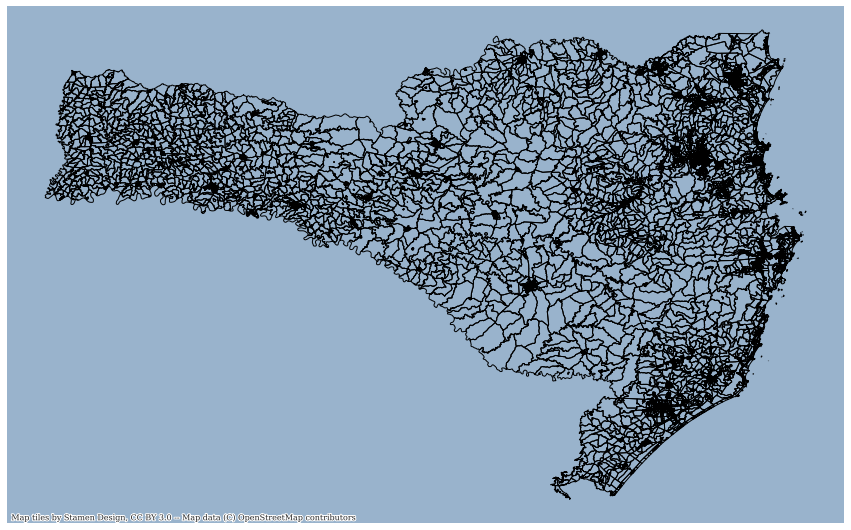

In [22]:
ax = sc_sectors_gdf.plot(figsize=(15, 10), edgecolor='black', facecolor='none')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [23]:
mao_sectors_gdf = sc_sectors_gdf[sc_sectors_gdf['NM_MUNICIP'] == 'ITAJAÍ']

In [24]:
mao_sectors_gdf.shape

(310, 14)

/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


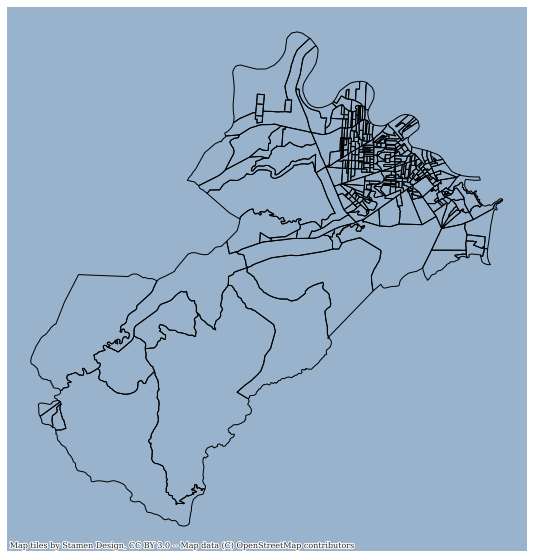

In [25]:
ax = mao_sectors_gdf.plot(figsize=(15, 10), edgecolor='black', facecolor='none')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


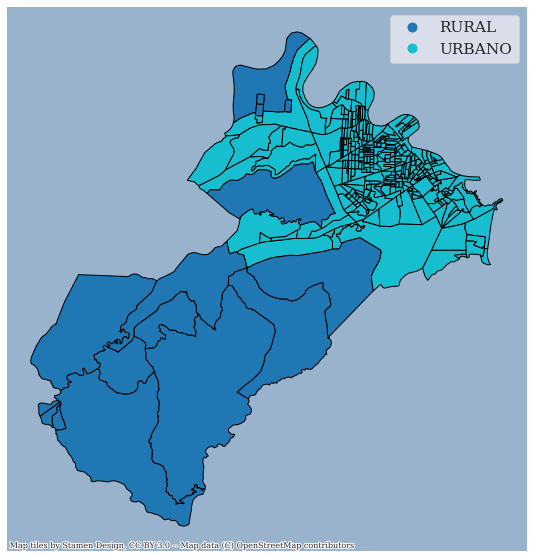

In [26]:
ax = mao_sectors_gdf.plot(figsize=(15, 10), edgecolor='black', column='TIPO', legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [27]:
mao_sectors_urb_gdf = mao_sectors_gdf[mao_sectors_gdf['TIPO'] == 'URBANO']

In [28]:
mao_sectors_urb_gdf.shape

(294, 14)

/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


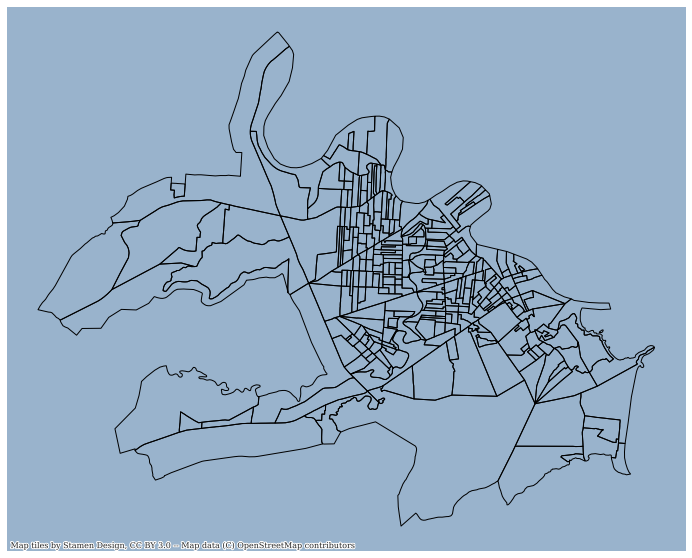

In [29]:
ax = mao_sectors_urb_gdf.plot(figsize=(15, 10), edgecolor='black', facecolor='none')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [30]:
mao_sectors_urb_gdf.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
5492,49643,420820305000024,URBANO,420820305002,Fazenda,42082030500,None,420820305,ITAJAÍ,4208203,ITAJAÍ,ITAJAÍ,VALE DO ITAJAÍ,"POLYGON ((-48.65422 -26.92615, -48.65289 -26.9..."
5493,49644,420820305000025,URBANO,420820305002,Fazenda,42082030500,None,420820305,ITAJAÍ,4208203,ITAJAÍ,ITAJAÍ,VALE DO ITAJAÍ,"POLYGON ((-48.65039 -26.92712, -48.64999 -26.9..."
5494,49645,420820305000026,URBANO,420820305002,Fazenda,42082030500,None,420820305,ITAJAÍ,4208203,ITAJAÍ,ITAJAÍ,VALE DO ITAJAÍ,"POLYGON ((-48.64789 -26.92588, -48.64764 -26.9..."
5495,49646,420820305000027,URBANO,420820305002,Fazenda,42082030500,None,420820305,ITAJAÍ,4208203,ITAJAÍ,ITAJAÍ,VALE DO ITAJAÍ,"POLYGON ((-48.64696 -26.92078, -48.64682 -26.9..."
5496,49647,420820305000028,URBANO,420820305002,Fazenda,42082030500,None,420820305,ITAJAÍ,4208203,ITAJAÍ,ITAJAÍ,VALE DO ITAJAÍ,"POLYGON ((-48.64147 -26.92425, -48.64144 -26.9..."


In [31]:
mao_sectors_urb_gdf['NM_BAIRRO'].unique()

array(['Fazenda', 'Cabeçudas', 'Praia Brava', 'Centro', 'Ressacada',
       'Dom Bosco', 'São Judas', 'Vila Operária', 'São João',
       'Barra do Rio', 'Cidade Nova', 'São Vicente', 'Cordeiros',
       'Salseiros', 'Espinheiros', 'Itaipava', 'Canhanduba'], dtype=object)

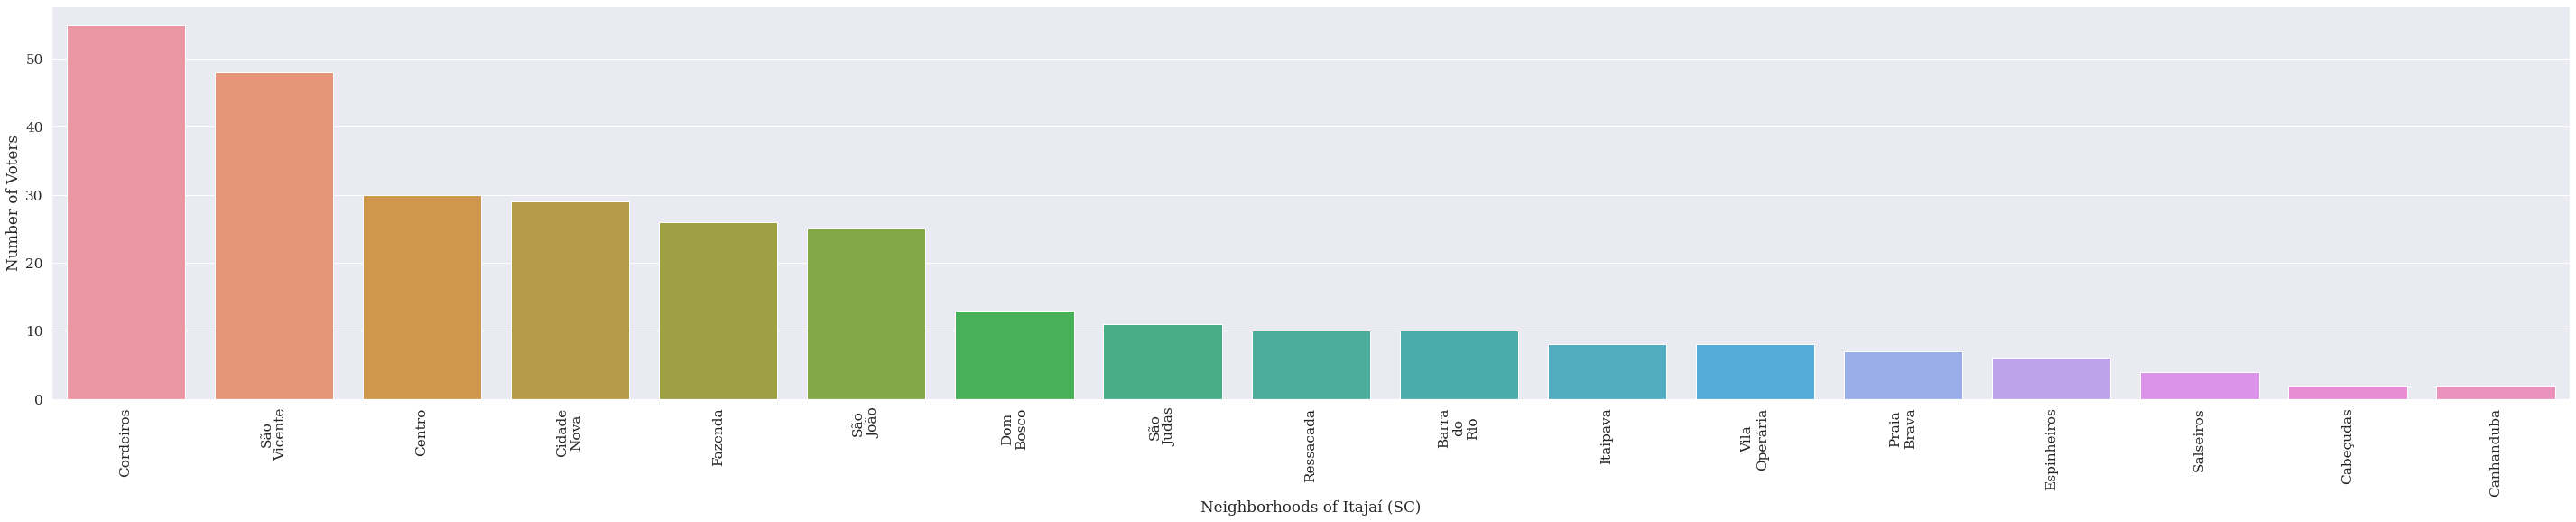

In [32]:
plt.figure(figsize=(50,8))

ax = sns.countplot(x='NM_BAIRRO', 
                   data=mao_sectors_urb_gdf, 
                   order=mao_sectors_urb_gdf['NM_BAIRRO'].value_counts().index)

labels = [item.get_text().replace(' ', '\n') for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation = 90)

ax.set_xlabel("Neighborhoods of Itajaí (SC)")
ax.set_ylabel("Number of Voters")

plt.show()

/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


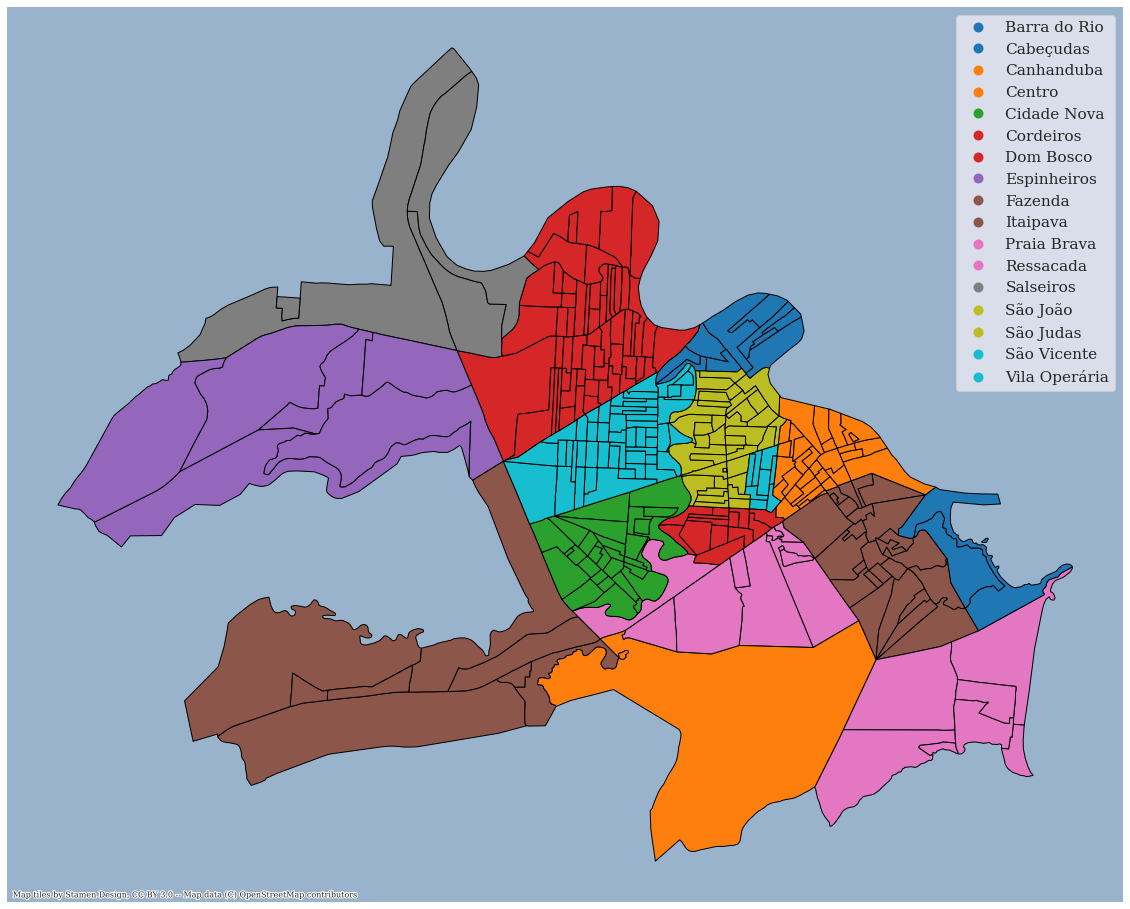

In [33]:
ax = mao_sectors_urb_gdf.plot(figsize=(20, 20), edgecolor='black', column='NM_BAIRRO', legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [34]:
mao_sectors_urb_gdf.to_file('/kaggle/working/mapas/mao_setores_urb.json', driver='GeoJSON')



```
# This is formatted as code
```

### 2010's Sense

* Fonte: [Instituto Brasileiro de Geografia e Estatística (IBGE)](https://www.ibge.gov.br/geociencias/downloads-geociencias.html)

In [35]:
if not os.path.exists('/kaggle/working/censo2010'):
    os.makedirs('/kaggle/working/censo2010')

In [36]:
url_censo_2010_sc = 'https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_do_Universo/Agregados_por_Setores_Censitarios/SC_20171016.zip'

In [ ]:
%%time

urlretrieve(url_censo_2010_sc, '/kaggle/working/censo2010/SC_20171016.zip')

In [ ]:
with zipfile.ZipFile('/kaggle/working/censo2010/SC_20171016.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/censo2010/')

In [ ]:
os.remove('/kaggle/working/censo2010/SC_20171016.zip')

![Arquivos da Base de Informações por Setores Censitários.png](attachment:ba5691fd-ed95-4aea-8188-570a11fbd7a3.png)

In [ ]:
sc_census_surroundings01_df = pd.read_csv('/kaggle/working/censo2010/SC/Base informaçoes setores2010 universo SC/CSV/Entorno01_SC.csv', sep=';')

In [ ]:
sc_census_surroundings01_df.shape

In [ ]:
sc_census_surroundings01_df.head()

###  Data cleaning and transformation

In [ ]:
sc_census_surroundings01_df.dtypes

In [ ]:
columns = [
    'V001', # Homes
    'V008', 'V010', 'V012', # Street Lighting
    'V014', 'V016', 'V018', # Paving
    'V020', 'V022', 'V024', # Sidewalk
    'V038', 'V040', 'V042', # Access Wheelchair Users
    'V044', 'V046', 'V048' # Afforest
          ]  
sc_census_surroundings01_df[columns] = sc_census_surroundings01_df[columns].replace('X', '0')

In [ ]:
sc_census_surroundings01_df[columns] = sc_census_surroundings01_df[columns].astype(int, copy=False)

In [ ]:
sc_census_surroundings01_df.dtypes

In [ ]:
sc_gdf = sc_census_surroundings01_df[['Cod_setor'] + columns]
sc_gdf.head()

In [ ]:
%%capture

sc_gdf['ILUMINACAO'] = sc_gdf.loc[:, 'V008':'V012'].sum(axis=1)
sc_gdf['PAVIMENTACAO'] = sc_gdf.loc[:, 'V014':'V018'].sum(axis=1)
sc_gdf['CALCADA'] = sc_gdf.loc[:, 'V020':'V024'].sum(axis=1)
sc_gdf['RAMPA_CADEIRANTE'] = sc_gdf.loc[:, 'V038':'V042'].sum(axis=1)
sc_gdf['ARBORIZACAO'] = sc_gdf.loc[:, 'V044':'V048'].sum(axis=1)

In [ ]:
sc_gdf.head()

In [ ]:
sc_gdf = sc_gdf.drop(columns=columns[1:]).copy()
sc_gdf.head()

In [ ]:
sc_gdf.columns = ['CD_GEOCODI', 'DOMICILIOS', 'ILUMINACAO', 'PAVIMENTACAO', 'CALCADA', 'RAMPA_CADEIRANTE', 'ARBORIZACAO']
sc_gdf.head()

In [ ]:
%%capture

mao_sectors_urb_gdf['CD_GEOCODI'] = mao_sectors_urb_gdf['CD_GEOCODI'].astype(int, copy=False)

In [ ]:
sc_gdf = pd.merge(mao_sectors_urb_gdf[['CD_GEOCODI', 'NM_BAIRRO', 'geometry']], sc_gdf, on='CD_GEOCODI')
sc_gdf = sc_gdf.dropna().copy()
sc_gdf.head()

In [ ]:
sc_gdf.shape

In [ ]:
sc_gdf.crs.to_string()

In [ ]:
sc_gdf = sc_gdf.to_crs(crs='EPSG:4674')

In [ ]:
sc_gdf.crs.to_string()

In [ ]:
sc_gdf.head()

In [ ]:
coord_center_itajai = [-26.9080307, -48.6681029]
map_itajai_info = folium.Map(location=coord_center_itajai, zoom_start=13)

In [ ]:
resolution, width, height = 150, 2, 2

for row in sc_gdf.values:
    setor_geo = folium.GeoJson(row[2])
    
    setor_geo_id = row[0]
    setor_geo_district = row[1]
    
    html = '<h2>{}</h2>'.format('Setor Censitário: ' + str(setor_geo_id))
    html += '<hr>'
    html += '<p>{}</p>'.format('Bairro: ' + setor_geo_district)
    html += '<hr>'
    html += sc_gdf[sc_gdf['CD_GEOCODI'] == setor_geo_id][['DOMICILIOS', 
                                                          'ILUMINACAO', 
                                                          'PAVIMENTACAO']].to_html(index=False)
    html += sc_gdf[sc_gdf['CD_GEOCODI'] == setor_geo_id][['CALCADA',
                                                          'RAMPA_CADEIRANTE',
                                                          'ARBORIZACAO']].to_html(index=False)
    
    iframe = folium.IFrame(html, width=(width*resolution)+20, height=(height*resolution)+20)
    setor_geo.add_child(folium.Popup(iframe, max_width=2650))
    
    map_itajai_info.add_child(setor_geo)

### Interactive Map


In [ ]:
map_itajai_info

### Thermal map by topic 


In [ ]:
sc_gdf

In [ ]:
map_itajai_wheelchair_users = folium.Map(location=coord_center_itajai, zoom_start=13)
map_itajai_home = folium.Map(location=coord_center_itajai, zoom_start=13)
map_itajai_street_lighting = folium.Map(location=coord_center_itajai, zoom_start=13)
map_itajai_afforest = folium.Map(location=coord_center_itajai, zoom_start=13)
map_itajai_paving = folium.Map(location=coord_center_itajai, zoom_start=13)
map_itajai_sidewalk = folium.Map(location=coord_center_itajai, zoom_start=13)

In [ ]:
folium.Choropleth(geo_data = sc_gdf,
                  name = 'Homes',
                  data = sc_gdf,
                  columns = ['CD_GEOCODI', 'DOMICILIOS'],
                  key_on = 'feature.properties.CD_GEOCODI',
                  fill_color = 'Reds',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Homes').add_to(map_itajai_home)

folium.Choropleth(geo_data = sc_gdf,
                  name = 'Street Lighting',
                  data = sc_gdf,
                  columns = ['CD_GEOCODI', 'ILUMINACAO'],
                  key_on = 'feature.properties.CD_GEOCODI',
                  fill_color = 'Reds',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Street Lighting').add_to(map_itajai_street_lighting)

folium.Choropleth(geo_data = sc_gdf,
                  name = 'Accessibility for wheelchair users',
                  data = sc_gdf,
                  columns = ['CD_GEOCODI', 'RAMPA_CADEIRANTE'],
                  key_on = 'feature.properties.CD_GEOCODI',
                  fill_color = 'Reds',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Accessibility for wheelchair users').add_to(map_itajai_wheelchair_users)

folium.Choropleth(geo_data = sc_gdf,
                  name = 'Afforest',
                  data = sc_gdf,
                  columns = ['CD_GEOCODI', 'ARBORIZACAO'],
                  key_on = 'feature.properties.CD_GEOCODI',
                  fill_color = 'Reds',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Afforest').add_to(map_itajai_afforest)

folium.Choropleth(geo_data = sc_gdf,
                  name = 'Paving',
                  data = sc_gdf,
                  columns = ['CD_GEOCODI', 'PAVIMENTACAO'],
                  key_on = 'feature.properties.CD_GEOCODI',
                  fill_color = 'Reds',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Paving').add_to(map_itajai_paving)

folium.Choropleth(geo_data = sc_gdf,
                  name = 'Sidewalk',
                  data = sc_gdf,
                  columns = ['CD_GEOCODI', 'CALCADA'],
                  key_on = 'feature.properties.CD_GEOCODI',
                  fill_color = 'Reds',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Sidewalk').add_to(map_itajai_sidewalk)



### Term map to wheelchair users


In [ ]:
map_itajai_wheelchair_users

### Term map to Street Lighting







In [ ]:
map_itajai_street_lighting

### Term map to Afforest





In [ ]:
map_itajai_afforest

### Term map to Homes




In [ ]:
map_itajai_home

### Term map to Paving


In [ ]:
map_itajai_paving

### Term map to Sidewalk


In [ ]:
map_itajai_sidewalk